In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

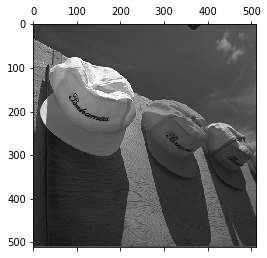

In [4]:
Row_Size = 512;
Column_Size = 512;
Input_raw = open('hat.raw','rb').read()
Input_raw = np.frombuffer(Input_raw,np.uint8)
Input_image = Input_raw[0:Row_Size*Column_Size]
Input_image = np.reshape(Input_image, (Row_Size,Column_Size))
plt.matshow(Input_image,cmap='gray')

In [34]:
Out_Matrix = np.zeros( (Row_Size, Column_Size) ) 
#Upper triangle
AB_1 = np.array([[0,-0.0020,1.0020,0.0020,0,-0.0020],
        [0, 0     ,1.0000,  0   ,0,   0]]);
for x in range(0,Row_Size):
    for y in range(x,Column_Size-x):
        XY = np.array([1,x,y,x**2,x*y,y**2]);
        UV = np.matmul(AB_1,XY.transpose()) ;
        u = int(np.round(UV[0]));
        v = int(np.round(UV[1]));
        Out_Matrix[u][v] = Input_image[x][y];

#Lower triangle
AB_2 = np.array([[0,2.0020,-1.0020,-0.0020,0,0.0020],
                [0, 0    ,1 , 0,0,0]]);
for x in range(Row_Size-1,0,-1):
    for y in range(Column_Size-x,x):
        XY = np.array([1,x,y,x**2,x*y,y**2]);
        UV = np.matmul(AB_2,XY.transpose()) ;
        u = int((UV[0]));
        v = int((UV[1]));
        Out_Matrix[u][v] = Input_image[x][y];
        
#Left triangle
AB_3 = np.array([[0, 1.0000, 0, 0, 0, 0],
                [0, 1.0020,-0.0020,-0.0020, 0, 0.0020]]);
for y in range(0,Column_Size):
    for x in range(y,Row_Size-y):
        XY = np.array([1,x,y,x**2,x*y,y**2]);
        UV = np.matmul(AB_3,XY.transpose()) ;
        u = int((UV[0]));
        v = int((UV[1]));
        Out_Matrix[u][v] = Input_image[x][y];
        
#Right triangle
AB_4 = np.array([[0, 1.0000, 0  ,   0 , 0 , 0],
                [0,-1.0020,2.0020, 0.0020 , 0 ,-0.0020]]);
for y in range(Column_Size-1,0,-1):
    for x in range(Row_Size-1-y,y+1):
        XY = np.array([1,x,y,x**2,x*y,y**2]);
        UV = np.matmul(AB_4,XY.transpose()) ;
        u = int((UV[0]));
        v = int((UV[1]));
        Out_Matrix[u][v] = Input_image[x][y];

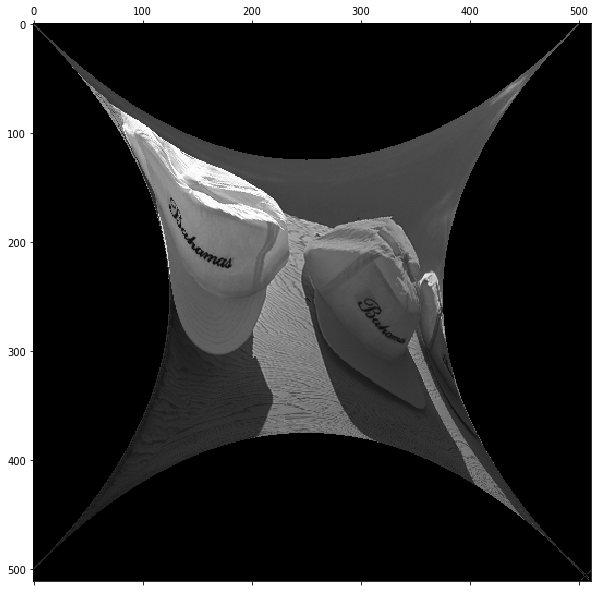

In [35]:
plt.figure(num=1, figsize=(10, 10))
plt.matshow(Out_Matrix,cmap='gray',fignum=1)

In [68]:
Out_Matrix = np.zeros( (Row_Size,Column_Size) )

for i in range(Row_Size-1,255,-1):
    for j in range(Column_Size-1-i,i+1):
        Out_Matrix[i][j] = 1;


In [69]:
Out_Matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [25]:
Matrix = np.zeros( (Row_Size,Column_Size) )   
for j in range(0,Column_Size):
    for i in range(j,Row_Size-j):
        Matrix[i][j] = 1;

In [26]:
Matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [48]:
Matrix = np.zeros( (Row_Size,Column_Size) )   
for j in range(Column_Size-1,0,-1):
    for i in range(Row_Size-1-j,j+1):
        Matrix[i][j] = 1;

In [49]:
Matrix

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [71]:
Out_Matrix = np.zeros( (Row_Size, Column_Size) ) 
#Upper triangle
AB_1 = np.array([[0,-0.0020,1.0020,0.0020,0,-0.0020],
        [0, 0     ,1.0000,  0   ,0,   0]]);
for x in range(0,255):
    for y in range(x,Column_Size-x):
        XY = np.array([1,x,y,x**2,x*y,y**2]);
        UV = np.matmul(AB_1,XY.transpose()) ;
        u = int(UV[0]);
        v = int(UV[1]);
        Out_Matrix[u][v] = Input_image[x][y];